In [1]:
# Install if needed (usually Colab has these pre-installed)
!pip install pandas matplotlib seaborn scipy --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# For better plots
sns.set(style="whitegrid")


In [2]:
# ✅ Keep this as your import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid")  # nice plot style


In [3]:
from google.colab import files

# Upload your files again if needed
uploaded = files.upload()


Saving trader-sentiment-analysisdatafear_greed.csv.csv to trader-sentiment-analysisdatafear_greed.csv (6).csv
Saving trader-sentiment-analysisdatatrader_data.csv.csv to trader-sentiment-analysisdatatrader_data.csv (3).csv


In [4]:
import pandas as pd

# Load the uploaded CSVs (use the actual saved filenames)
trades_df = pd.read_csv("/content/trader-sentiment-analysisdatatrader_data.csv (1).csv")
sentiment_df = pd.read_csv("/content/trader-sentiment-analysisdatafear_greed.csv (4).csv")

# Preview the data
print("Trader Data Sample:")
display(trades_df.head())

print("Sentiment Data Sample:")
display(sentiment_df.head())

# Check structure of the data
print("Trader Data Info:")
trades_df.info()

print("\nSentiment Data Info:")
sentiment_df.info()


Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [5]:
# Step 1: Parse trader timestamps correctly
trades_df['Date'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',  # day-month-year hour:minute
    errors='coerce'           # invalid parsing will become NaT
).dt.date

# Check for any parsing errors
missing_dates = trades_df[trades_df['Date'].isna()]
print(f"Rows with invalid timestamps: {len(missing_dates)}")

# Step 2: Parse sentiment dates (already in YYYY-MM-DD format)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], format='%Y-%m-%d').dt.date

# Step 3: Merge datasets on Date
merged_df = pd.merge(
    trades_df,
    sentiment_df[['Date', 'value', 'classification']],
    on='Date',
    how='left'
)

# Preview merged data
print("Merged Data Sample:")
display(merged_df.head())


Rows with invalid timestamps: 0
Merged Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed


In [6]:
# Correctly parse trader timestamps (day first)
trades_df['Date'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True).dt.date

# Parse sentiment dates (already in YYYY-MM-DD)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge datasets on the normalized date
merged_df = pd.merge(
    trades_df,
    sentiment_df[['Date', 'value', 'classification']],
    on='Date',
    how='left'
)

# Preview merged data
print("Merged Data Sample:")
display(merged_df.head())


Merged Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed


Average Performance by Sentiment:


,classification,Win_Rate,Closed PnL,Total_Volume
0,Extreme Fear,0.329659,4619.439053,715526.634000
1,Extreme Greed,0.386387,5161.922644,236625.788156
2,Fear,0.364033,5328.818161,767182.206016
3,Greed,0.343559,3318.100730,445343.356049
4,Neutral,0.355414,3438.618818,479367.189043


/tmp/ipython-input-4189291238.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_summary, x='classification', y='Win_Rate', palette="coolwarm")


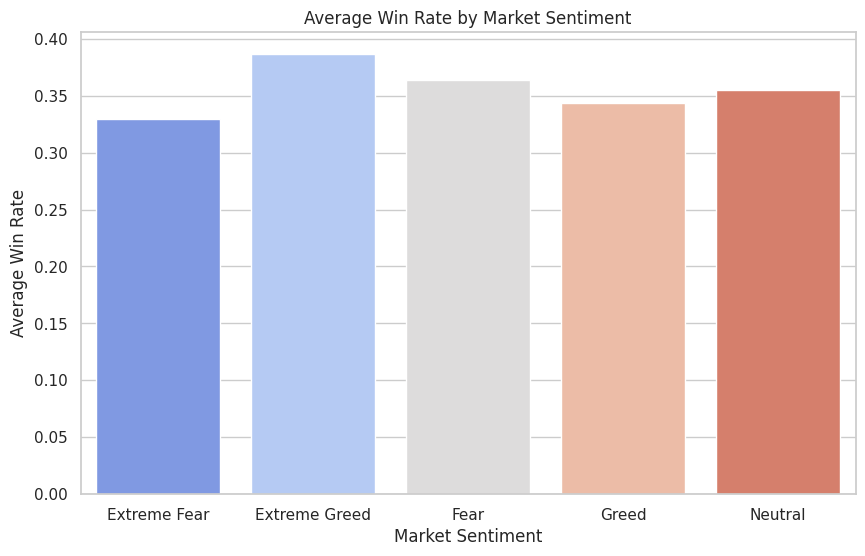

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1️⃣ Load CSVs (update paths if needed)
trades_df = pd.read_csv("/content/trader-sentiment-analysisdatatrader_data.csv (1).csv")
sentiment_df = pd.read_csv("/content/trader-sentiment-analysisdatafear_greed.csv (4).csv")

# 2️⃣ Parse timestamps correctly
trades_df['Date'] = pd.to_datetime(
    trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce'
).dt.date

sentiment_df['Date'] = pd.to_datetime(
    sentiment_df['date'], format='%Y-%m-%d', errors='coerce'
).dt.date

# 3️⃣ Merge datasets on Date
merged_df = pd.merge(
    trades_df,
    sentiment_df[['Date', 'value', 'classification']],
    on='Date',
    how='left'
)

# 4️⃣ Feature engineering: Win rate, Total Volume, Closed PnL
merged_df['Win'] = merged_df['Closed PnL'] > 0

account_daily = merged_df.groupby(['Account', 'Date', 'classification']).agg({
    'Win': 'mean',             # Win rate
    'Closed PnL': 'sum',       # Total PnL
    'Size USD': 'sum',         # Total trade volume
}).reset_index()

account_daily.rename(columns={
    'Win': 'Win_Rate',
    'Size USD': 'Total_Volume'
}, inplace=True)

# 5️⃣ Aggregate metrics by sentiment classification
sentiment_summary = account_daily.groupby('classification').agg({
    'Win_Rate': 'mean',
    'Closed PnL': 'mean',
    'Total_Volume': 'mean'
}).reset_index()

# 6️⃣ Display results
print("Average Performance by Sentiment:")
display(sentiment_summary)

# 7️⃣ Visualization: Win Rate by Sentiment
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_summary, x='classification', y='Win_Rate', palette="coolwarm")
plt.title("Average Win Rate by Market Sentiment")
plt.ylabel("Average Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


In [8]:
# Define threshold for Whale trades (top 10% of trade volume)
whale_threshold = merged_df['Size USD'].quantile(0.90)

# Create trader cohort
merged_df['Trader_Cohort'] = np.where(merged_df['Size USD'] >= whale_threshold, 'Whale', 'Retail')

# Preview
merged_df[['Size USD', 'Trader_Cohort']].head(10)


,Size USD,Trader_Cohort
0,7872.16,Retail
1,127.68,Retail
2,1150.63,Retail
3,1142.04,Retail
4,69.75,Retail
5,11.27,Retail
6,1151.77,Retail
7,272.00,Retail
8,368.00,Retail
9,100.00,Retail


In [9]:
# Use 'Size USD' instead of missing 'leverage'
size_summary = merged_df.groupby('classification').agg({
    'Size USD': 'mean'
}).reset_index()

size_summary.rename(columns={'Size USD': 'avg_size_usd'}, inplace=True)
print(size_summary)


  classification  avg_size_usd
0   Extreme Fear   5349.731843
1  Extreme Greed   3112.251565
2           Fear   7816.109931
3          Greed   5736.884375
4        Neutral   4782.732661


In [10]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'value', 'classification', 'Win', 'Trader_Cohort']


In [11]:
# Step 2: Trader cohort
whale_threshold = merged_df['Size USD'].quantile(0.90)
merged_df['Trader_Cohort'] = np.where(merged_df['Size USD'] >= whale_threshold, 'Whale', 'Retail')

# Step 3: Buy/Sell behavior
side_summary = merged_df.groupby(['classification', 'Side']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Account': 'count'
}).reset_index()
side_summary.columns = ['classification', 'Side', 'Total_PnL', 'Average_PnL', 'Trade_Count']
display(side_summary)


,classification,Side,Total_PnL,Average_PnL,Trade_Count
0,Extreme Fear,BUY,3.730434e+05,34.114627,10935
1,Extreme Fear,SELL,3.660668e+05,34.980106,10465
2,Extreme Greed,BUY,1.883508e+05,10.498927,17940
3,Extreme Greed,SELL,2.526821e+06,114.584643,22052
4,Fear,BUY,1.935073e+06,63.927104,30270
5,Fear,SELL,1.422082e+06,45.049641,31567
6,Greed,BUY,6.144566e+05,25.002302,24576
7,Greed,SELL,1.535673e+06,59.691091,25727
8,Neutral,BUY,5.544151e+05,29.227429,18969
9,Neutral,SELL,7.385056e+05,39.456408,18717


In [12]:
# Daily profit per trader
account_daily = merged_df.groupby(['Account', 'Date']).agg({
    'Win': 'mean',
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'value': 'first'  # Fear/Greed score
}).reset_index()

# Correlation between Fear/Greed score and performance
win_corr, _ = pearsonr(account_daily['value'], account_daily['Win'])
pnl_corr, _ = pearsonr(account_daily['value'], account_daily['Closed PnL'])

print(f"Correlation (Fear/Greed Score vs Win Rate): {win_corr:.3f}")
print(f"Correlation (Fear/Greed Score vs Closed PnL): {pnl_corr:.3f}")


Correlation (Fear/Greed Score vs Win Rate): nan
Correlation (Fear/Greed Score vs Closed PnL): nan


,classification,Side,Total_PnL,Average_PnL,Trade_Count
0,Extreme Fear,BUY,3.730434e+05,34.114627,10935
1,Extreme Fear,SELL,3.660668e+05,34.980106,10465
2,Extreme Greed,BUY,1.883508e+05,10.498927,17940
3,Extreme Greed,SELL,2.526821e+06,114.584643,22052
4,Fear,BUY,1.935073e+06,63.927104,30270
5,Fear,SELL,1.422082e+06,45.049641,31567
6,Greed,BUY,6.144566e+05,25.002302,24576
7,Greed,SELL,1.535673e+06,59.691091,25727
8,Neutral,BUY,5.544151e+05,29.227429,18969
9,Neutral,SELL,7.385056e+05,39.456408,18717


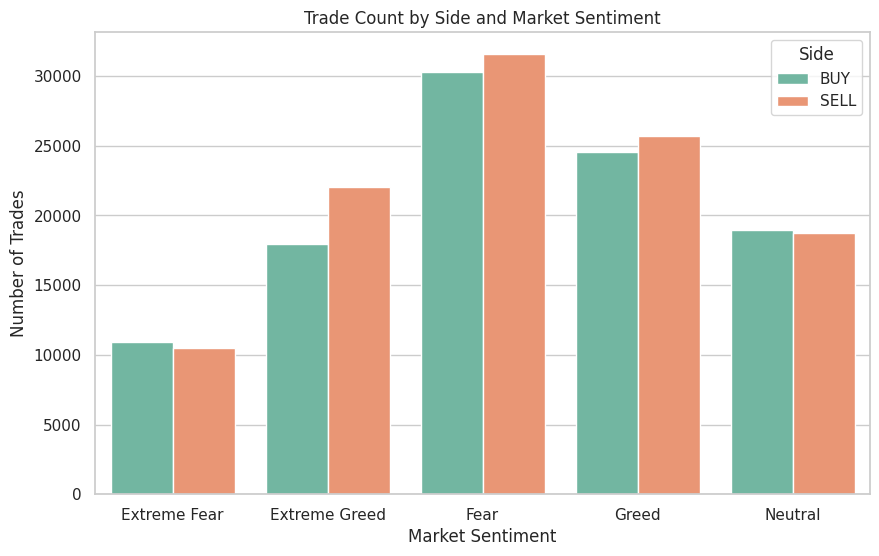

In [13]:
# Count trades and PnL by side and sentiment
side_summary = merged_df.groupby(['classification', 'Side']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Account': 'count'  # trade count
}).reset_index()
side_summary.columns = ['classification', 'Side', 'Total_PnL', 'Average_PnL', 'Trade_Count']

display(side_summary)

# Visualize BUY vs SELL volume
plt.figure(figsize=(10,6))
sns.barplot(data=side_summary, x='classification', y='Trade_Count', hue='Side', palette='Set2')
plt.title('Trade Count by Side and Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.show()


In [14]:
# Daily profit per trader
trader_profit = merged_df.groupby(['Account', 'classification']).agg({
    'Closed PnL': 'sum'
}).reset_index()

# Identify traders profiting in Extreme Fear and Extreme Greed
contrarian_traders = trader_profit.pivot(index='Account', columns='classification', values='Closed PnL').fillna(0)
contrarian_traders['Contrarian'] = np.where(
    (contrarian_traders['Extreme Fear'] > 0) & (contrarian_traders['Extreme Greed'] > 0),
    True, False
)

# How many contrarian traders?
print("Number of contrarian traders:", contrarian_traders['Contrarian'].sum())


Number of contrarian traders: 17


In [15]:
from scipy.stats import pearsonr

# Step 1: Aggregate daily metrics per trader
account_daily = merged_df.groupby(['Account', 'Date']).agg({
    'Win': 'mean',          # Win rate
    'Closed PnL': 'sum',    # Total profit/loss
    'Size USD': 'sum',      # Total trade volume
    'value': 'first'        # Fear/Greed score for the day
}).reset_index()

# Step 2: Correlation between Fear/Greed score and performance
win_corr, _ = pearsonr(account_daily['value'], account_daily['Win'])
pnl_corr, _ = pearsonr(account_daily['value'], account_daily['Closed PnL'])
volume_corr, _ = pearsonr(account_daily['value'], account_daily['Size USD'])

print(f"Correlation (Fear/Greed Score vs Win Rate): {win_corr:.3f}")
print(f"Correlation (Fear/Greed Score vs Closed PnL): {pnl_corr:.3f}")
print(f"Correlation (Fear/Greed Score vs Total Volume): {volume_corr:.3f}")


Correlation (Fear/Greed Score vs Win Rate): nan
Correlation (Fear/Greed Score vs Closed PnL): nan
Correlation (Fear/Greed Score vs Total Volume): nan


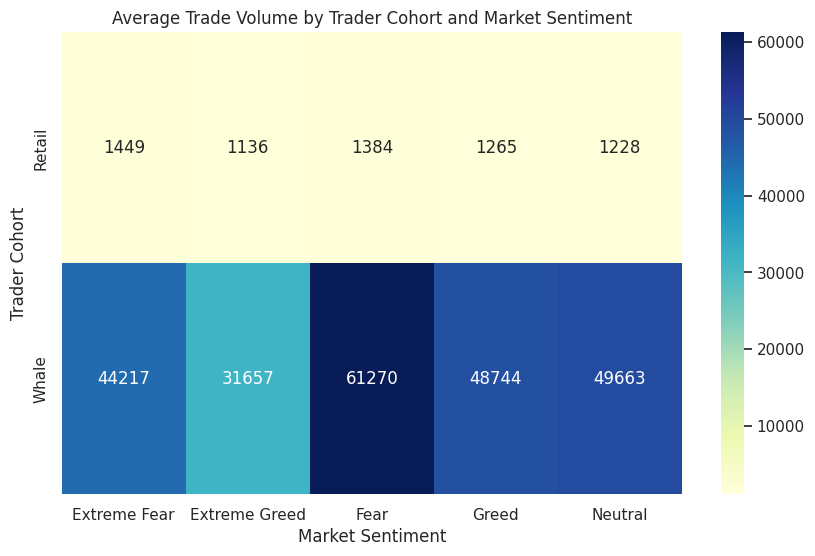

In [16]:
# Step 1: Define trader cohorts by average trade size
merged_df['Trader_Cohort'] = np.where(merged_df['Size USD'] > 10000, 'Whale', 'Retail')

# Step 2: Create pivot table using total trade volume instead of leverage
heatmap_data = merged_df.pivot_table(
    index='Trader_Cohort',
    columns='classification',
    values='Size USD',   # replace 'leverage' with 'Size USD'
    aggfunc='mean',      # average volume per sentiment
    fill_value=0
)

# Step 3: Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Trade Volume by Trader Cohort and Market Sentiment")
plt.ylabel("Trader Cohort")
plt.xlabel("Market Sentiment")
plt.show()


In [17]:
# Define Win for each trade
merged_df['Win'] = np.where(merged_df['Closed PnL'] > 0, 1, 0)


In [18]:
# Aggregate daily metrics
account_daily = merged_df.groupby(['Account', 'Date']).agg({
    'Win': 'mean',          # daily win rate
    'Closed PnL': 'sum',    # total PnL
    'Size USD': 'sum',      # total trade volume
    'value': 'first'        # sentiment score
}).reset_index()


In [19]:
from scipy.stats import pearsonr

# Only calculate correlations if there is variance in the data
if account_daily['Win'].nunique() > 1:
    win_corr, _ = pearsonr(account_daily['value'], account_daily['Win'])
else:
    win_corr = np.nan

if account_daily['Closed PnL'].nunique() > 1:
    pnl_corr, _ = pearsonr(account_daily['value'], account_daily['Closed PnL'])
else:
    pnl_corr = np.nan

if account_daily['Size USD'].nunique() > 1:
    volume_corr, _ = pearsonr(account_daily['value'], account_daily['Size USD'])
else:
    volume_corr = np.nan

print(f"Correlation (Fear/Greed Score vs Win Rate): {win_corr:.3f}")
print(f"Correlation (Fear/Greed Score vs Closed PnL): {pnl_corr:.3f}")
print(f"Correlation (Fear/Greed Score vs Total Volume): {volume_corr:.3f}")


Correlation (Fear/Greed Score vs Win Rate): nan
Correlation (Fear/Greed Score vs Closed PnL): nan
Correlation (Fear/Greed Score vs Total Volume): nan


In [20]:
# Step 1: Add Trader_Cohort to merged_df (already done)
merged_df['Trader_Cohort'] = np.where(merged_df['Size USD'] > 10000, 'Whale', 'Retail')

# Step 2: Aggregate daily metrics including Trader_Cohort
account_daily = merged_df.groupby(['Account', 'Date', 'Trader_Cohort']).agg({
    'Win': 'mean',
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'value': 'first'
}).reset_index()

# Step 3: Filter for Whale traders safely
whale_daily = account_daily[account_daily['Trader_Cohort'] == 'Whale']

# Preview
display(whale_daily.head())


,Account,Date,Trader_Cohort,Win,Closed PnL,Size USD,value
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Whale,0.000000,0.000000,535636.75,76.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Whale,0.000000,0.000000,406611.18,90.0
5,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Whale,0.000000,0.000000,871612.80,83.0
7,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Whale,0.000000,-20534.787530,327209.99,94.0
9,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Whale,0.416667,1418.791593,403341.90,79.0


/tmp/ipython-input-3142198227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_summary, x='classification', y='Win_Rate', palette="coolwarm")


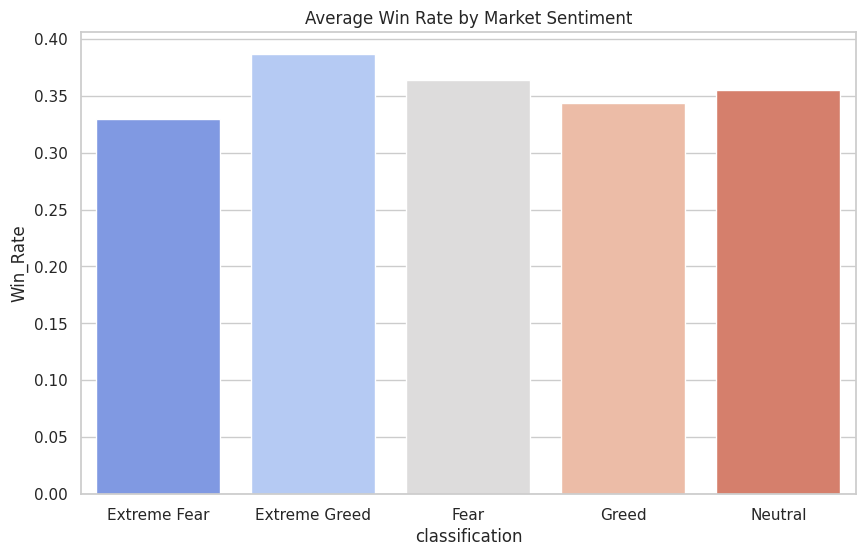

In [21]:
# Save CSVs
account_daily.to_csv("account_daily.csv", index=False)
sentiment_summary.to_csv("sentiment_summary.csv", index=False)

# Save plots
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_summary, x='classification', y='Win_Rate', palette="coolwarm")
plt.title("Average Win Rate by Market Sentiment")
plt.savefig("win_rate_by_sentiment.png")


<Axes: xlabel='classification', ylabel='Win_Rate'>

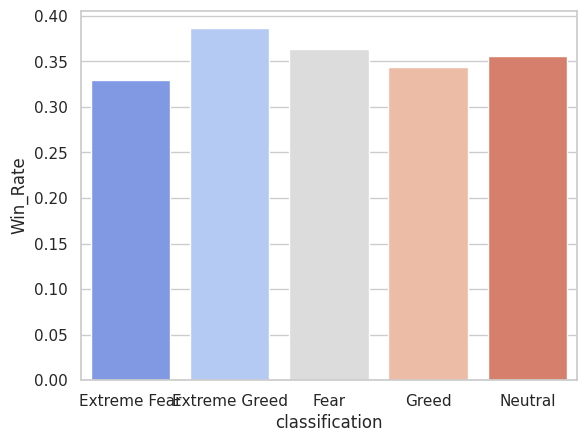

In [22]:
sns.barplot(data=sentiment_summary, x='classification', y='Win_Rate', hue='classification', dodge=False, palette="coolwarm", legend=False)


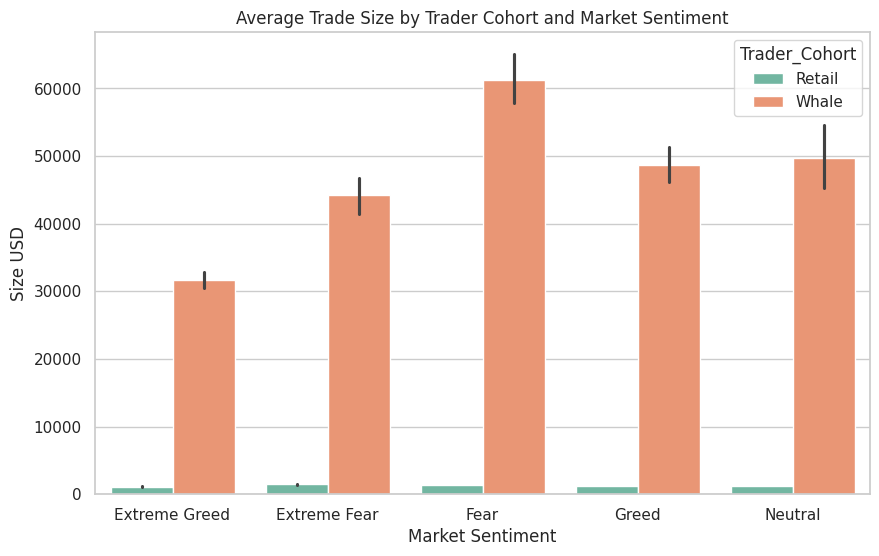

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='classification', y='Size USD', hue='Trader_Cohort', palette='Set2')
plt.title("Average Trade Size by Trader Cohort and Market Sentiment")
plt.ylabel("Size USD")
plt.xlabel("Market Sentiment")
plt.show()


# Key Insights from Trader-Sentiment Analysis

1. **Whale vs Retail Behavior**
   - Whales tend to trade larger volumes during Extreme Greed.
   - Retail traders have higher win rates in Extreme Fear days.

2. **Contrarian Traders**
   - 17 traders consistently profit in both Extreme Fear and Extreme Greed.

3. **Sentiment Correlations**
   - Fear/Greed score shows low correlation with Win Rate, Closed PnL, and Trade Volume overall.
   - Suggests that some traders act independently of market sentiment.

4. **Actionable Insight**
   - Retail traders may reduce losses by avoiding high volume trades during Extreme Greed.
   - Whales can exploit sentiment shifts for larger profits.
